In [5]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import operator
from sklearn.preprocessing import MinMaxScaler
import datetime

In [6]:
def cut_df(df, left_boundary, right_boundary):
    """
    Вырезка из DataFrame временного интервала
    :param df:
    :param left_boundary:
    :param right_boundary:
    :return:
    """
    for start, end in zip(left_boundary, right_boundary):
        df = df[(df.index >= start) & (df.index <= end)]
    return df

In [7]:
wells = ['569', '601', '1354', '1567', '1602', '1628']


time_marks_adaptation = {'252': '_2019_11_16_17_40_20',
                         '569': '_2019_11_16_14_59_46',
                         '601': '_2019_11_16_18_13_00',
                         '1354': '_2019_11_15_14_48_55',
                         '1567': '_2019_11_06_19_04_07',
                         '1602': '_2019_11_15_19_49_55',
                         '1628': '_2019_11_16_17_15_24'
                        }
time_marks_ad_in = {'252': '_2019_11_16_17_36_10',
                    '569': '_2019_11_16_14_57_40',
                    '601': '_2019_11_16_18_10_47',
                    '1354': '_2019_11_15_14_45_46',
                    '1567': '_2019_11_06_18_32_41',
                    '1602': '_2019_11_15_15_21_36',
                    '1628': '_2019_11_16_15_00_17'
                   }

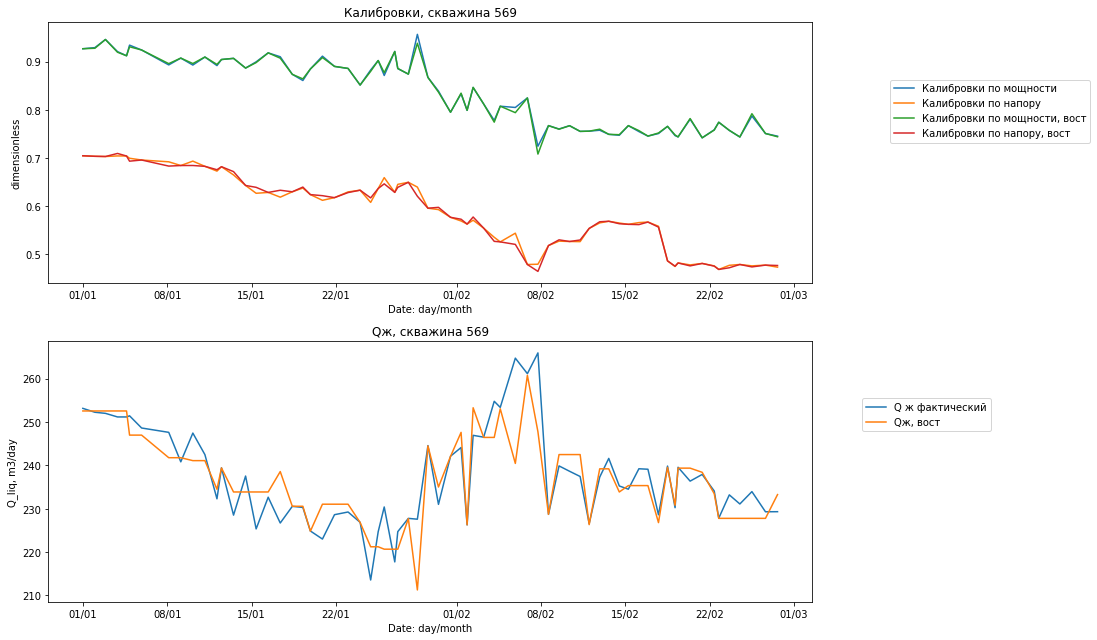

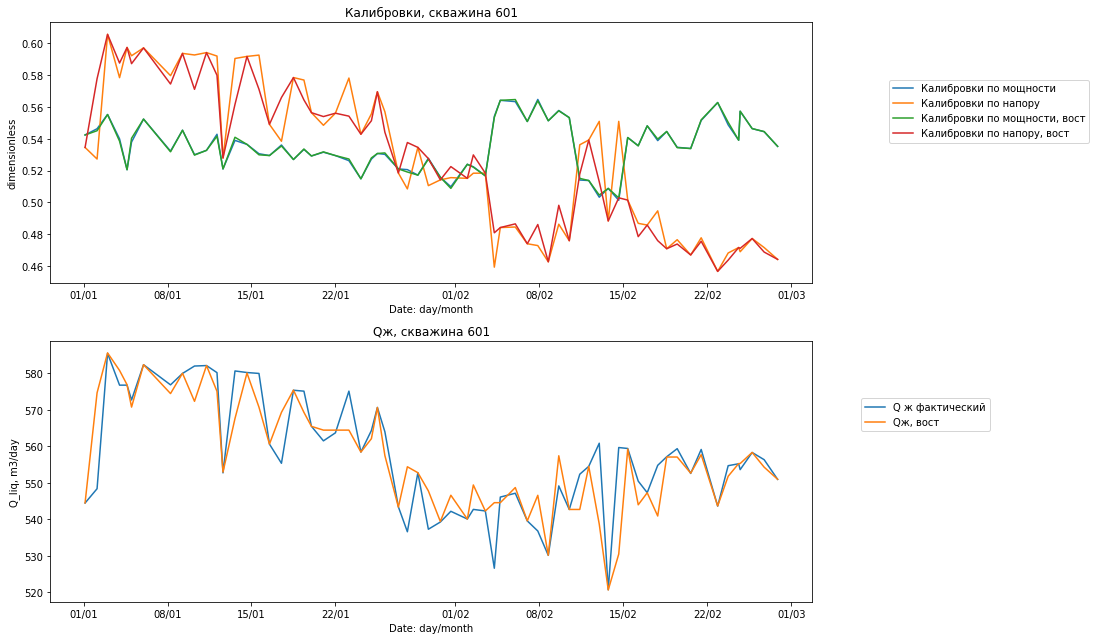

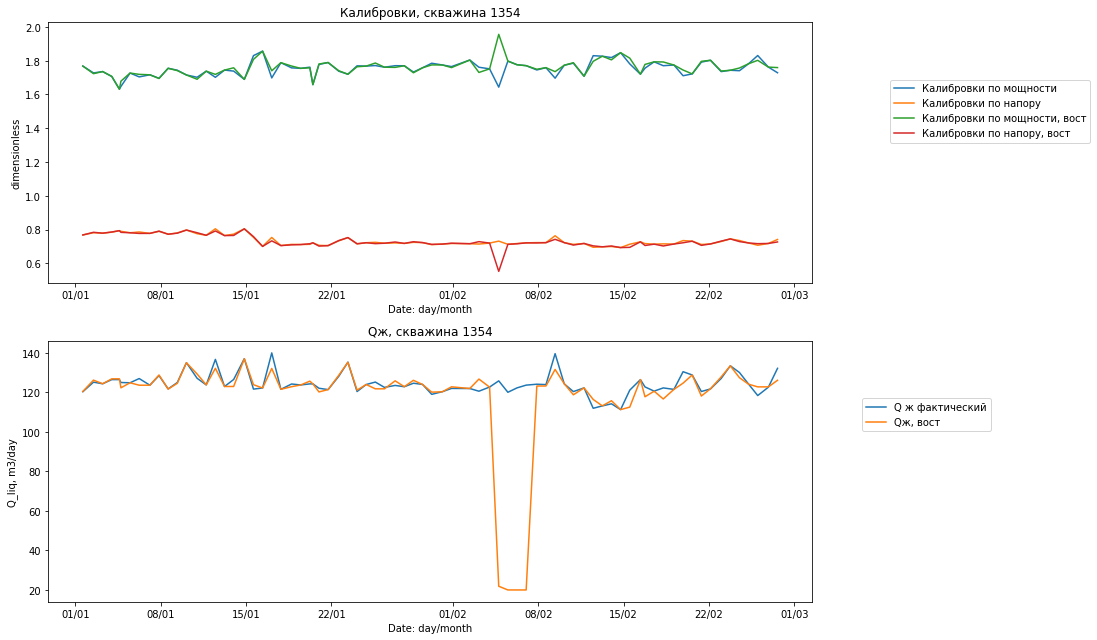

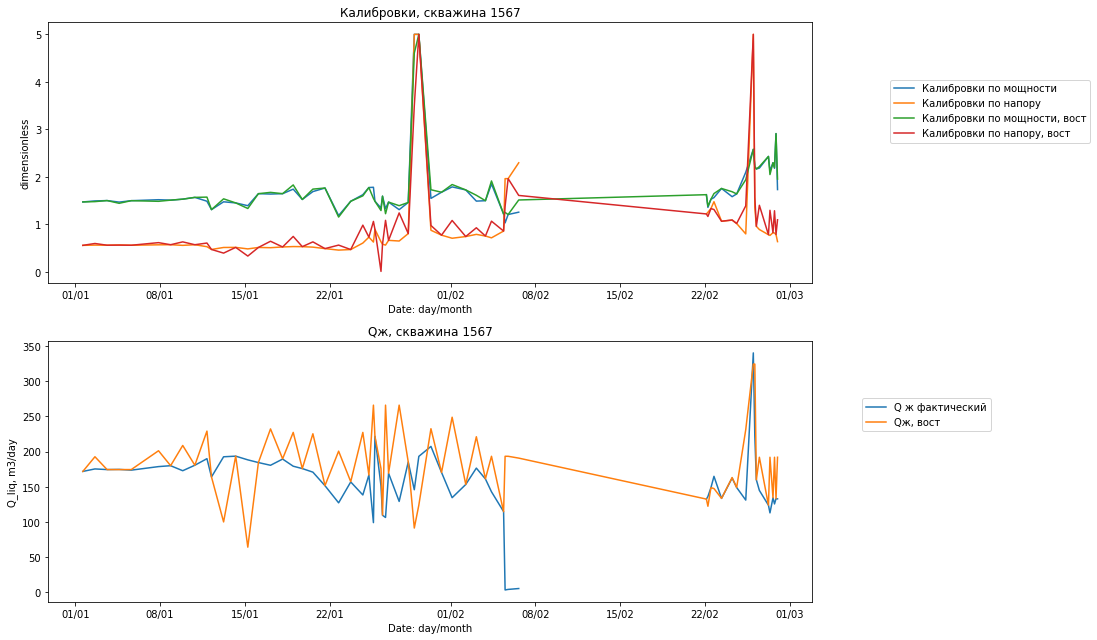

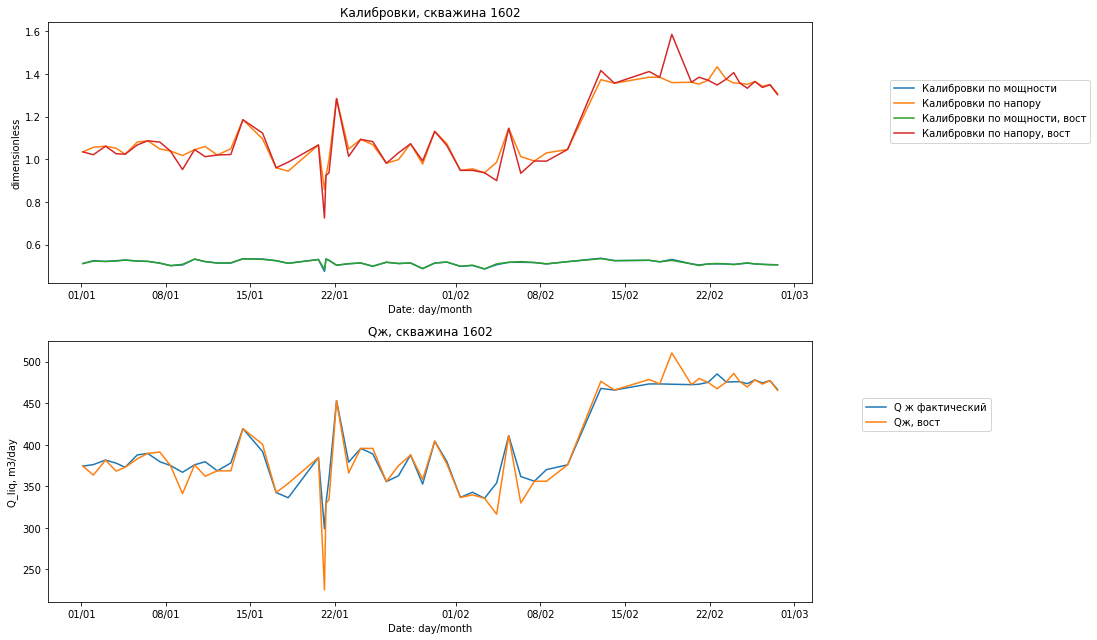

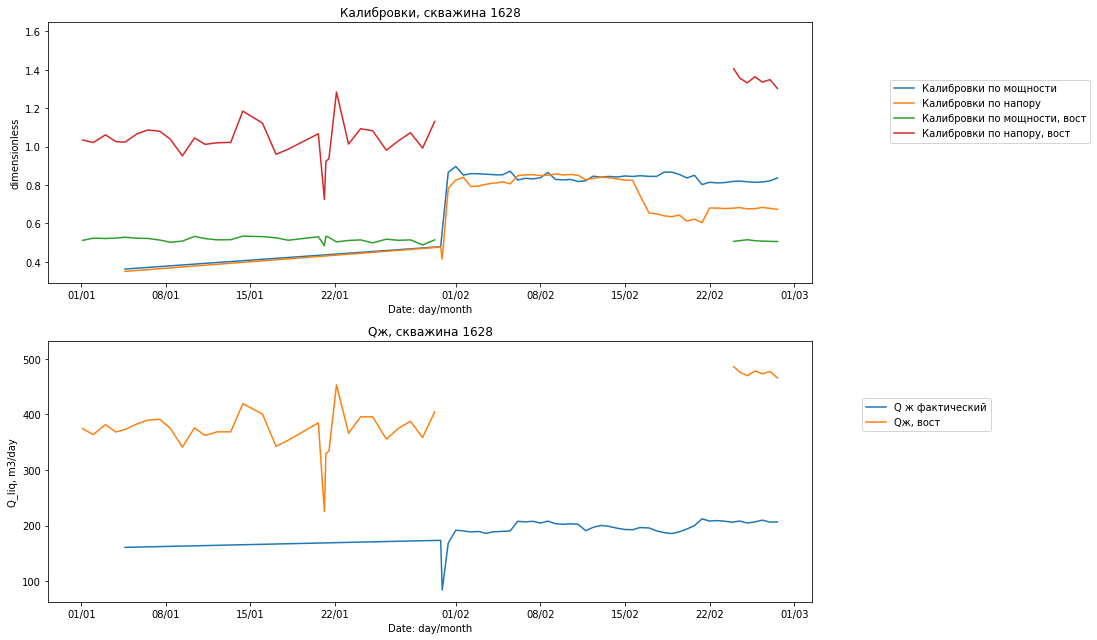

In [8]:
for well in wells:
    fig = plt.figure(figsize=(16,9))
    w_data_adapt = pd.read_csv(f'data\\{well}\\adaptation_\\{well}_calc_and_input.csv')
    w_data_restore = pd.read_csv(f'data\\{well}\\restore_\\{well}_calc_and_input.csv')
    
    # строим калибровки
    ax =plt.subplot(2, 1, 1)
    date = pd.to_datetime(w_data_adapt['Время'])
    ax.plot(date, w_data_adapt['К. калибровки по мощности - множитель (Модель)'], label='Калибровки по мощности')
    ax.plot(date, w_data_adapt['К. калибровки по напору - множитель (Модель)'], label='Калибровки по напору')

    date = pd.to_datetime(w_data_restore['Время'])
    ax.plot(date, w_data_restore['К. калибровки по мощности - множитель (Модель)'], label='Калибровки по мощности, вост')
    ax.plot(date, w_data_restore['К. калибровки по напору - множитель (Модель)'], label='Калибровки по напору, вост')

    ax.set(xlabel='Date: day/month', ylabel='dimensionless',
           title=f'Калибровки, скважина {well}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.37, 0.8))
    ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))
    
    # строим дебиты
    
    ax = plt.subplot(2, 1, 2)
    date = pd.to_datetime(w_data_adapt['Время'])
    ax.plot(date, w_data_adapt['Q ж, м3/сут (Модель)'], label='Q ж фактический')
    ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))

    date = pd.to_datetime(w_data_restore['Время'])
    ax.plot(date, w_data_restore['Q ж, м3/сут (Модель)'], label='Qж, вост')

    ax.set(xlabel='Date: day/month', ylabel='Q_liq, m3/day',
           title=f'Qж, скважина {well}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.24, 0.8))
    plt.tight_layout()
    plt.savefig(f'images/{well}/{well}.png')
    plt.show()

# На гистограмме покажем ошбки графиков

In [19]:
'''
if '1567' in wells:
    wells.remove('1567')
'''
well_mae_perc = {}
for well in wells:
    metr_w = pd.read_csv(f'data\\{well}\\restore_\\{well}_adapt_restore_metrics_tr_report.csv')
    well_mae_perc[well] = metr_w[metr_w['Unnamed: 0'] == f'{well} (CALIBR)']['Средняя относительная ошибка Q ж'].values[0]

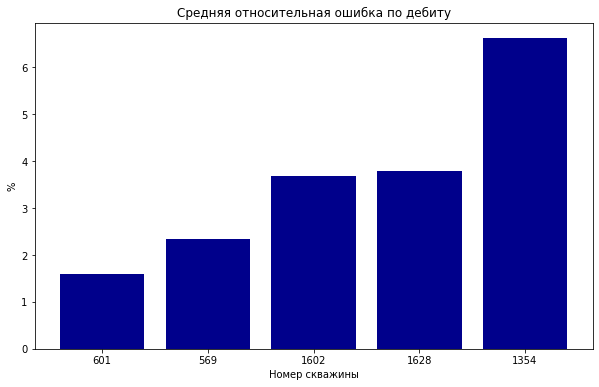

In [23]:
sorted_d = sorted(well_mae_perc.items(), key=operator.itemgetter(1))
sorted_mae_d = {}
for i in range(len(sorted_d)):
    if sorted_d[i][0] != '1567':
        sorted_mae_d[sorted_d[i][0]] = sorted_d[i][1]
fig, ax = plt.subplots(figsize=(10, 6))

# Define x and y axes
ax.bar(sorted_mae_d.keys(), sorted_mae_d.values(), color = 'darkblue')

# Set plot title and axes labels
ax.set(title = "Средняя относительная ошибка по дебиту",
       xlabel = "Номер скважины",
       ylabel = "%")


plt.savefig(f'images/well_mae_hist.png')
plt.show()

1. активная мощность и дебит(initedit), адапт инпут тож самое

# Построение исходных данных

In [ ]:
'''
sc = MinMaxScaler()
for well in wells:
    fig = plt.figure(figsize=(16,9))
    w_data_adapt_in = pd.read_csv(f'{well}\\{well}\\adapt_input{time_marks_ad_in[well]}\\{well}_adapt_input.csv')
    
    ax = plt.subplot(2, 1, 2)
    #fig, ax = plt.subplots(figsize=(16, 8))
    date = pd.to_datetime(w_data_adapt_in['Время'])
    ax.plot(date, sc.fit_transform(w_data_adapt_in['Активная мощность (СУ)'].values.reshape(-1, 1)),
            label='Активная мощность (СУ)')
    ax.plot(date, sc.fit_transform(w_data_adapt_in['ГФ (СУ)'].values.reshape(-1, 1)),
            label='ГФ (СУ)')
    ax.plot(date, sc.fit_transform(w_data_adapt_in['Процент обводненности (СУ)'].values.reshape(-1, 1)),
            label='Обводненность (СУ)')
    ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))

    ax.set(xlabel='Date: day/month', ylabel='dimentionless',
           title=f'Отмасштабированные входные данные, скважина {well}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.24, 0.8))
    plt.tight_layout()
    plt.savefig(f'images\\init_data_with_gf_{well}.png')
    plt.show()
'''

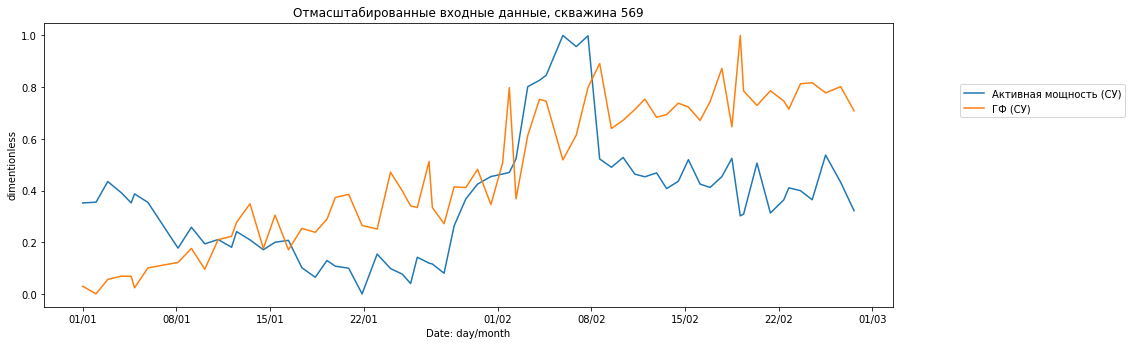

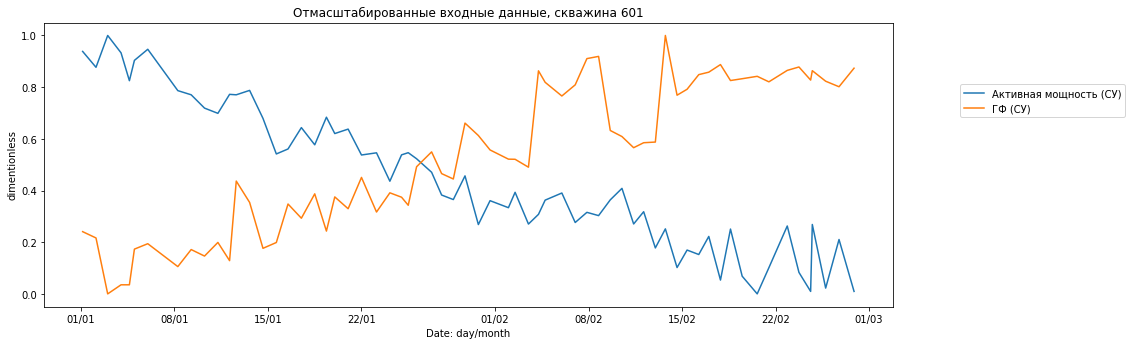

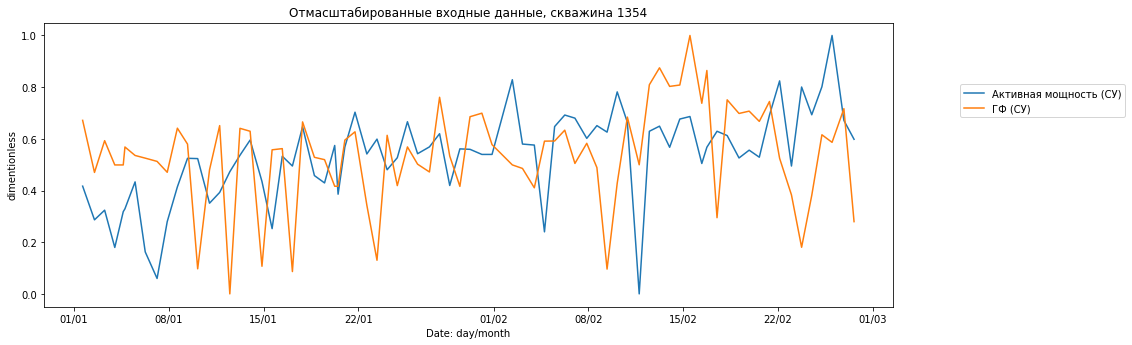

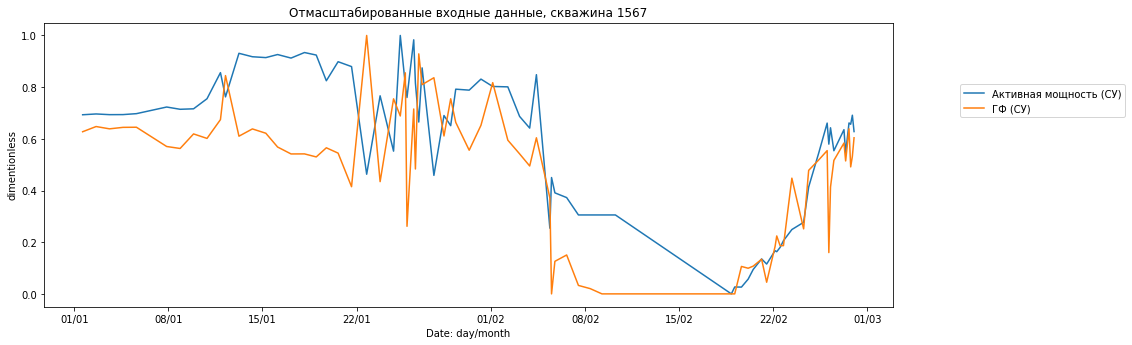

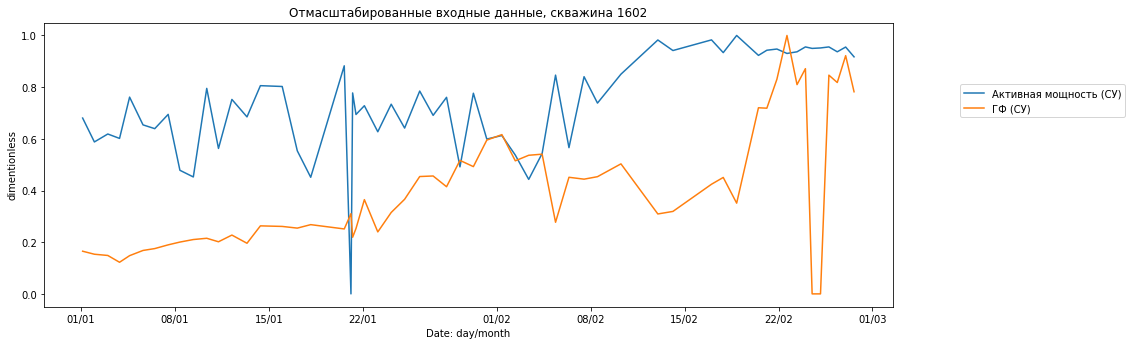

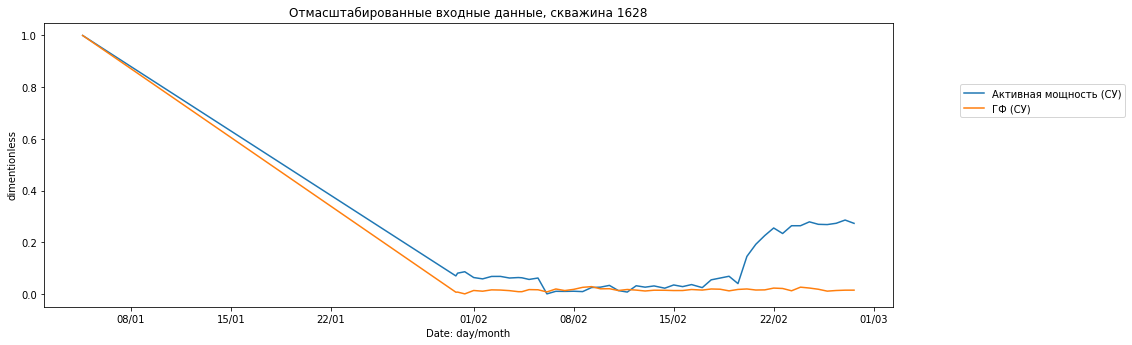

In [18]:
sc = MinMaxScaler()
for well in wells:
    fig = plt.figure(figsize=(16,9))
    w_data_adapt_in = pd.read_csv(f'data\\{well}\\adapt_input\\{well}_adapt_input.csv')
    
    ax = plt.subplot(2, 1, 2)
    #fig, ax = plt.subplots(figsize=(16, 8))
    date = pd.to_datetime(w_data_adapt_in['Время'])
    ax.plot(date, sc.fit_transform(w_data_adapt_in['Активная мощность (СУ)'].values.reshape(-1, 1)),
            label='Активная мощность (СУ)')
    ax.plot(date, sc.fit_transform(w_data_adapt_in['ГФ (СУ)'].values.reshape(-1, 1)),
            label='ГФ (СУ)')
    ax.xaxis.set_major_formatter(DateFormatter('%d/%m'))

    ax.set(xlabel='Date: day/month', ylabel='dimentionless',
           title=f'Отмасштабированные входные данные, скважина {well}')
    plt.legend(loc='upper right', bbox_to_anchor=(1.28, 0.8))
    plt.tight_layout()
    plt.savefig(f'images\\{well}\\init_data_power_and_gf_{well}.png')
    plt.show()

# 19 слайд инти дата, сделаем норм графики для патернов